# Tests in simulation

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import LMCE.uav_trajectory as uav_trajectory
from LMCE.error_estimation import error_calculator, find_best_cutoff

In [18]:
traj = uav_trajectory.Trajectory()
traj.loadcsv("./LMCE/flight_paths/figure8.csv")
traj.stretchtime(2)

ts = np.arange(0, traj.duration, 0.01)
evals = np.empty((len(ts), 15))
for t, i in zip(ts, range(0, len(ts))):
    e = traj.eval(t)
    e.pos += np.array([0, 0, 1])
    evals[i, 0:3] = e.pos

target_pos = evals.transpose()

starts = [26, 102, 175]
ends = [51, 127, 202]

starts = [500]
ends = [990]

## Simulation with and without f_a visualization

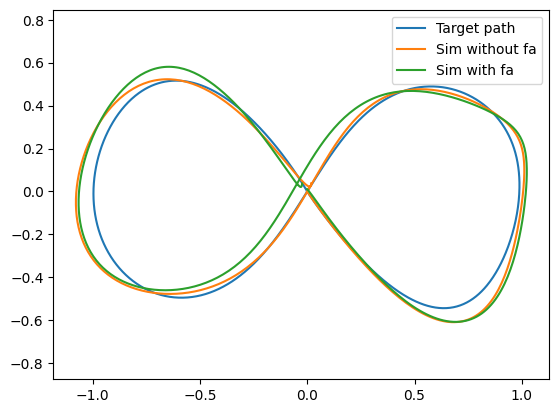

In [19]:
df = pd.read_csv("./sim_data/lee/csv/cf231.csv")
with_fa = np.array([df["x"][starts[0]:ends[0]], df["y"][starts[0]:ends[0]]])

df = pd.read_csv("./sim_data/lee_nofa/csv/cf231.csv")
without_fa =np.array([df["x"][starts[0]:ends[0]], df["y"][starts[0]:ends[0]]])

plt.plot(target_pos[0], target_pos[1], label="Target path")
plt.plot(without_fa[0], without_fa[1], label="Sim without fa")
plt.plot(with_fa[0], with_fa[1], label="Sim with fa")
plt.axis("equal")
plt.legend()
plt.show()

## Errors between cases

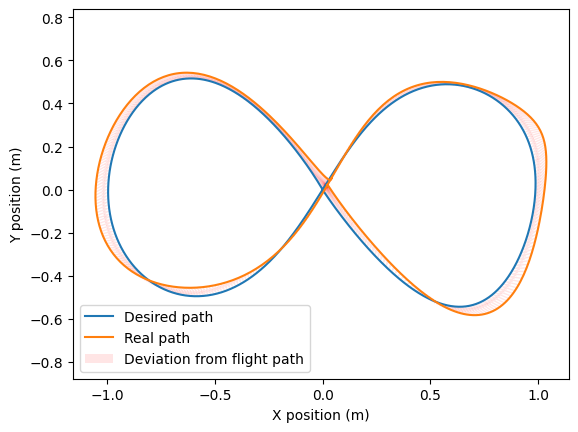

Avg. error with constforcenn: 0.0609 (m)


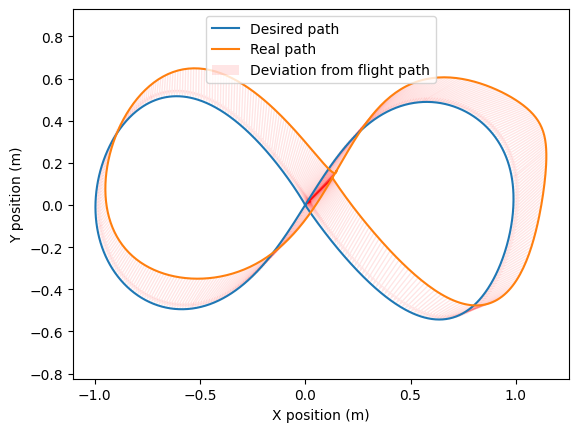

Avg. error with constforce: 0.1750 (m)


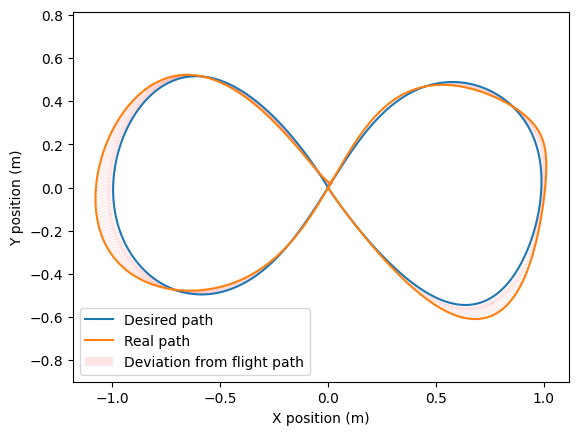

Avg. error with lee_nofa: 0.0513 (m)


In [20]:
categories = ["realnn", "realtree", "fanonn", "nofa"]
categories = ["both", "lee_nofa"]

for c in categories:
    avg_error = 0
    for s, _ in enumerate(starts):
        df = pd.read_csv(f"./sim_data/{c}/csv/cf231.csv")
        path = np.array([df["x"][starts[s]:ends[s]], df["y"][starts[s]:ends[s]]])

        cutoff = find_best_cutoff(path, target_pos)
        avg_error += error_calculator(cutoff, path, target_pos, vis=True)

    avg_error /= len(starts)
    print(f"Avg. error with {c}: {avg_error:.4f} (m)")